In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv("src/Speed+Dating+Data2.csv", encoding='ISO-8859-1')
print(df.shape)

(8378, 195)


In [3]:
print(df.columns)

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)


In [4]:
print(df.describe)

<bound method NDFrame.describe of       iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
...   ...   ...     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22.0       1   44       2    21     22        14      10.0      5   
8374  552  22.0       1   44       2    21     22        13      10.0      4   
8375  552  22.0       1   44       2    21     22        19      10.0     10   
8376  552  22.0       1   44       2    21     22         3      10.0     16   
8377  552   NaN       1   44       2    21     22         2      10.0     15   

     

In [5]:
print(df.describe(include=['object']))

           field     undergra    mn_sat    tuition      from zipcode  \
count       8315         4914      3133       3583      8299    7314   
unique       259          241        68        115       269     409   
top     Business  UC Berkeley  1,400.00  26,908.00  New York       0   
freq         521          107       403        241       522     355   

           income   career  
count        4279     8289  
unique        261      367  
top     55,080.00  Finance  
freq          124      202  


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64


In [7]:
df_match_1 = df[df['match'] == 1]

# Vérifier les valeurs manquantes dans ce sous-ensemble
missing_values = df_match_1.isnull().sum()

# Afficher seulement les colonnes qui ont des valeurs manquantes
missing_values = missing_values[missing_values > 0]
print("Missing values for match=1:")
print(missing_values)

# Compter et afficher les valeurs de match avec les pourcentages
match_counts = df['match'].value_counts()
match_percentages = df['match'].value_counts(normalize=True) * 100

# Afficher les résultats
print("\nMatch counts:")
print(match_counts)
print("\nMatch percentages:")
print(match_percentages)

Missing values for match=1:
positin1     334
int_corr      30
age_o         18
race_o        14
pf_o_att      15
            ... 
attr5_3     1017
sinc5_3     1017
intel5_3    1017
fun5_3      1017
amb5_3      1017
Length: 180, dtype: int64

Match counts:
match
0    6998
1    1380
Name: count, dtype: int64

Match percentages:
match
0    83.528288
1    16.471712
Name: proportion, dtype: float64


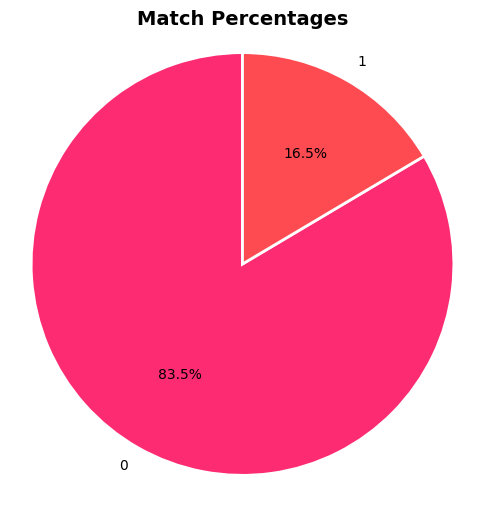

In [8]:
colors = ['#FD2C72', '#FE4A51']  # Couleurs personnalisées

plt.figure(figsize=(6, 6))
plt.pie(match_percentages, labels=match_percentages.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
plt.title('Match Percentages', fontsize=14, fontweight='bold')
plt.axis('equal')  # Assurer que le camembert est dessiné comme un cercle.

plt.show()

Number of rows after filtering for match = 1: 1380


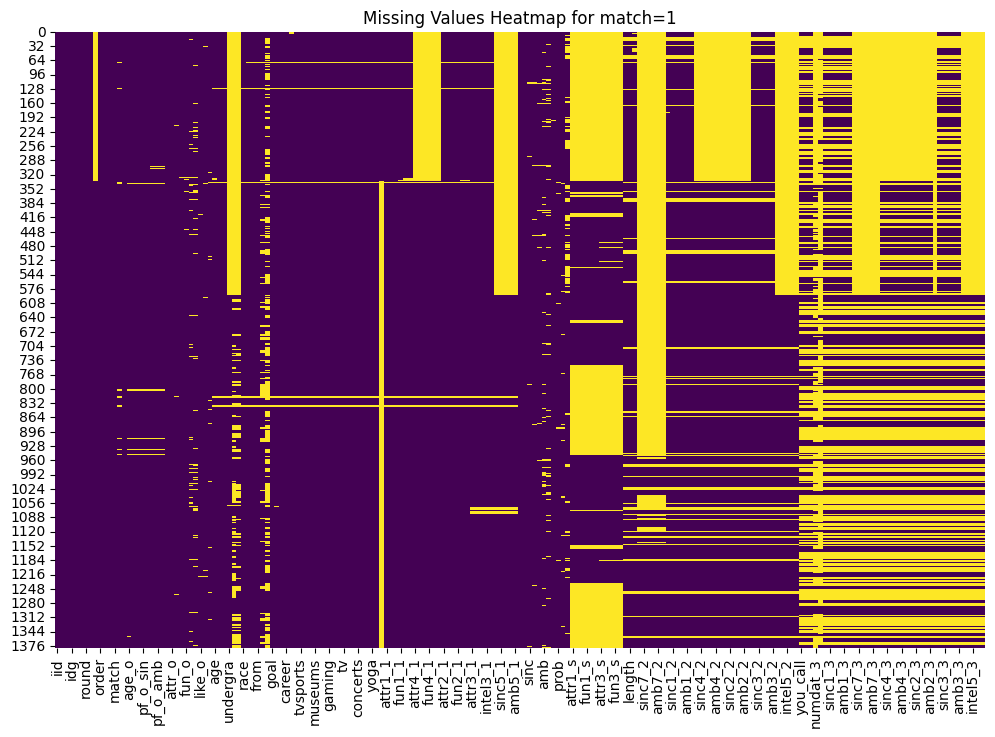

In [9]:
# Filtrer les lignes où match = 1 et réinitialiser l'index
df_match_1 = df[df['match'] == 1].reset_index(drop=True)

# Vérifier le nombre de lignes après le filtrage
print(f"Number of rows after filtering for match = 1: {df_match_1.shape[0]}")

# Visualiser les valeurs manquantes dans df_match_1
plt.figure(figsize=(12, 8))
sns.heatmap(df_match_1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for match=1')
plt.show()

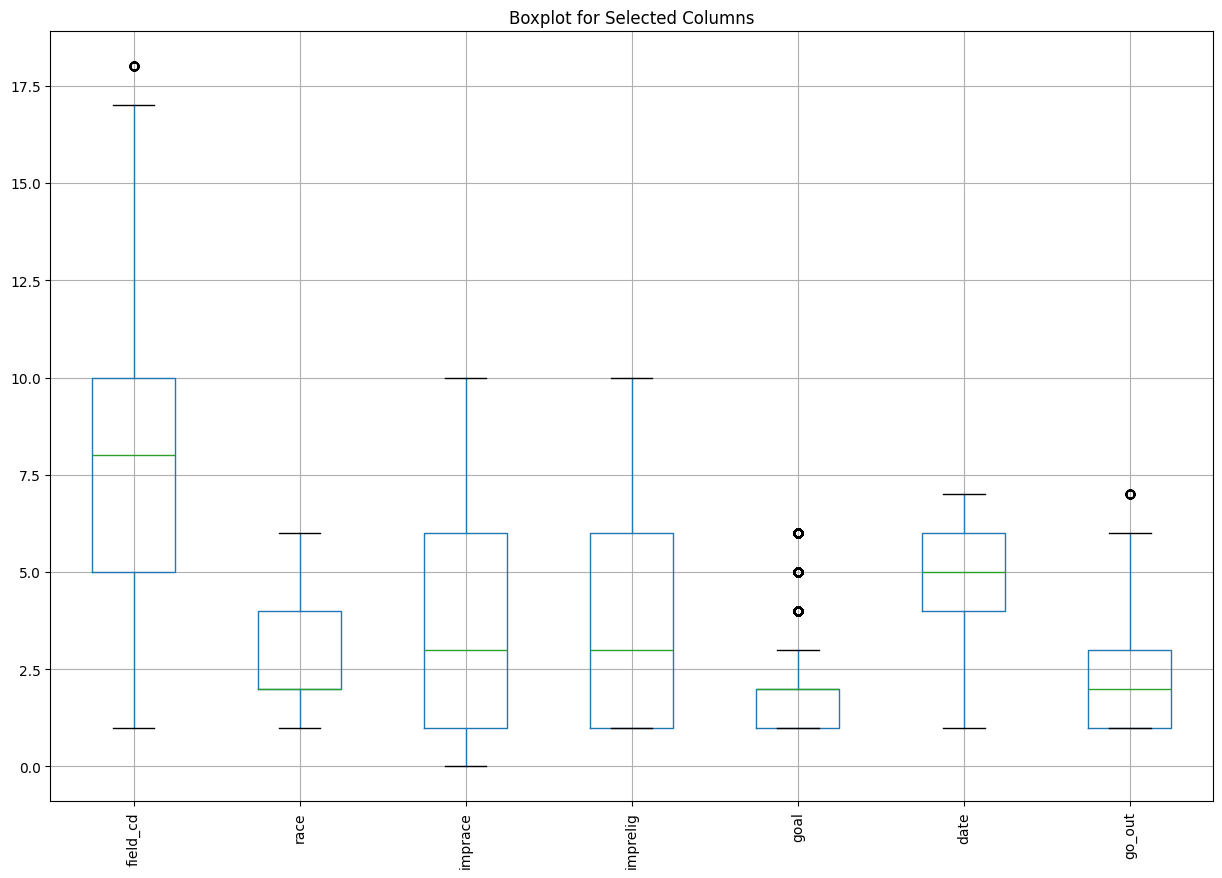

In [10]:
# Specify the columns you want to plot
columns_to_plot = ['field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career']

# Plot a boxplot for the selected columns
df[columns_to_plot].boxplot(figsize=(15, 10))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.title('Boxplot for Selected Columns')
plt.show()

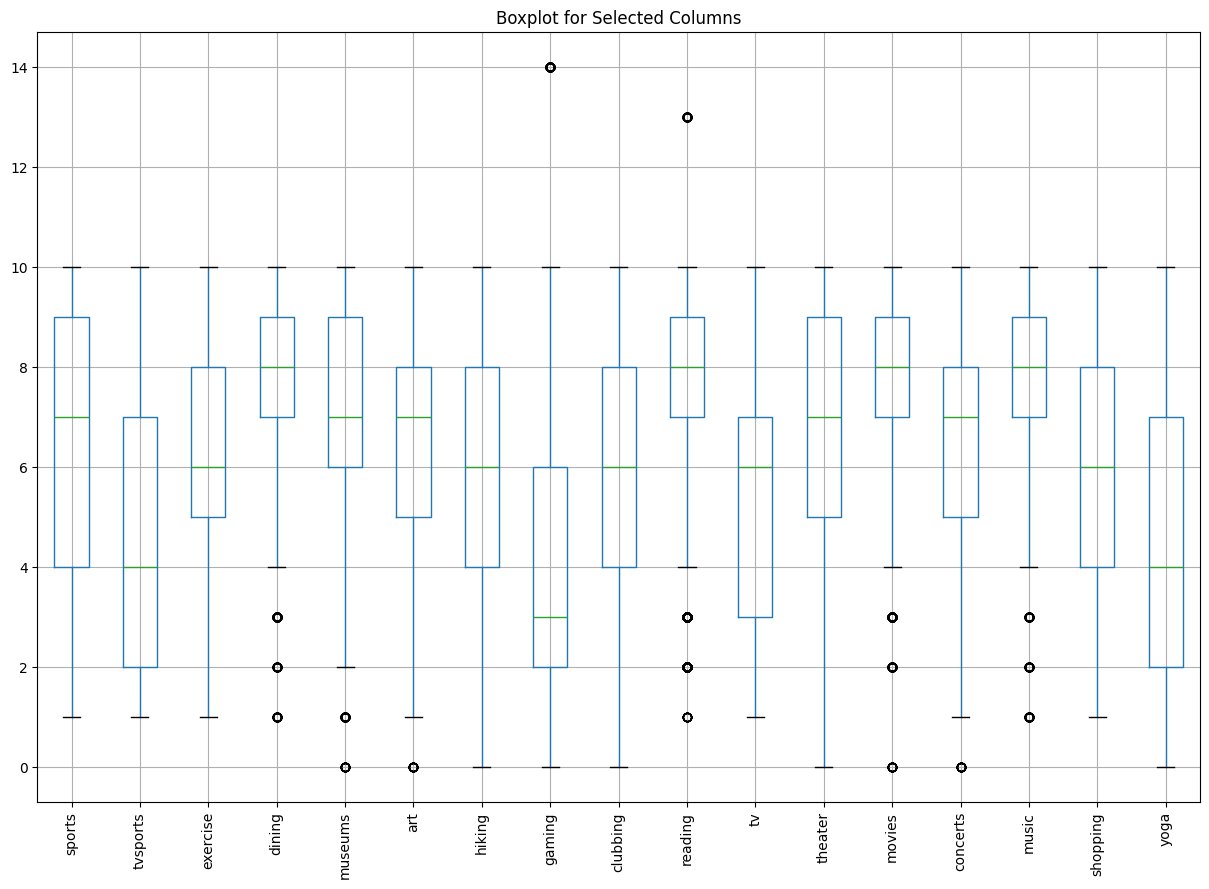

In [11]:
# Specify the columns you want to plot
columns_to_plot = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
                       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Plot a boxplot for the selected columns
df[columns_to_plot].boxplot(figsize=(15, 10))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.title('Boxplot for Selected Columns')
plt.show()

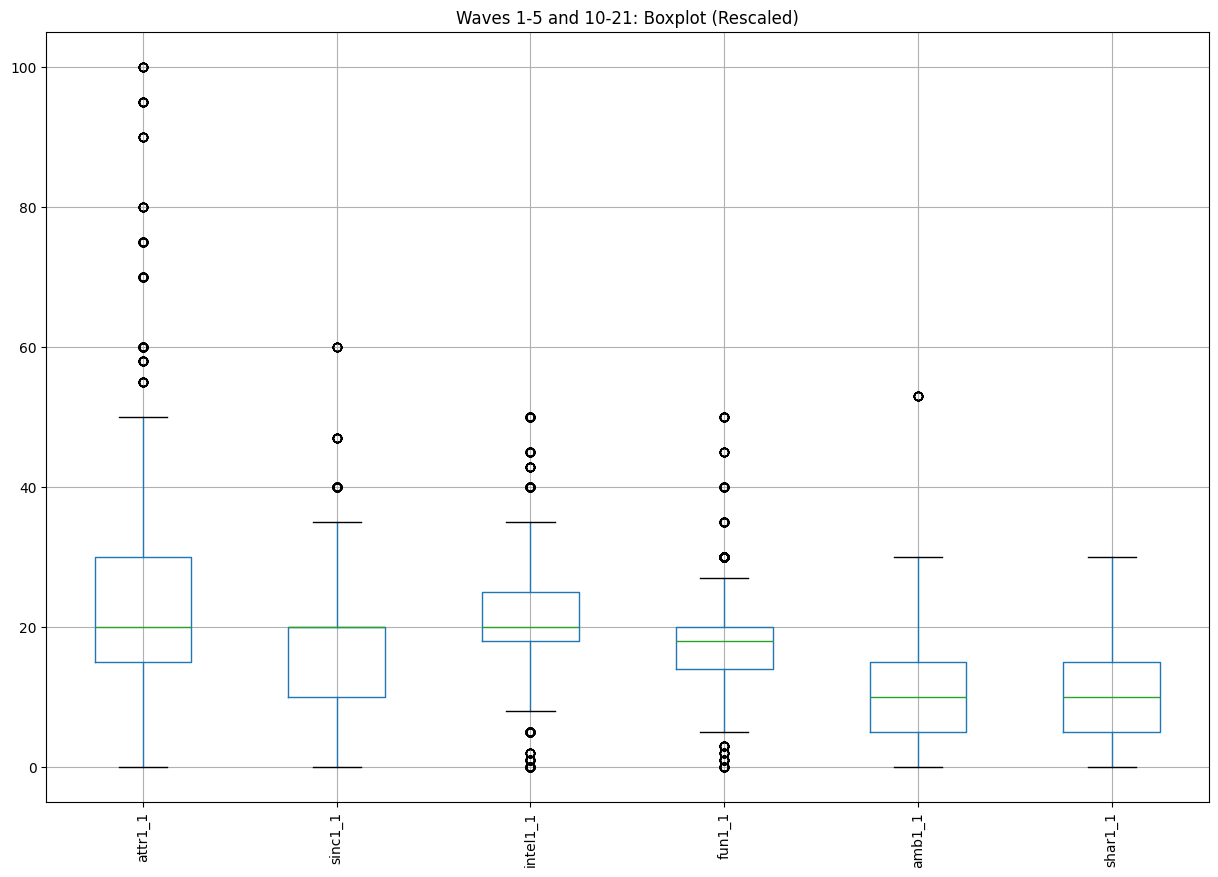

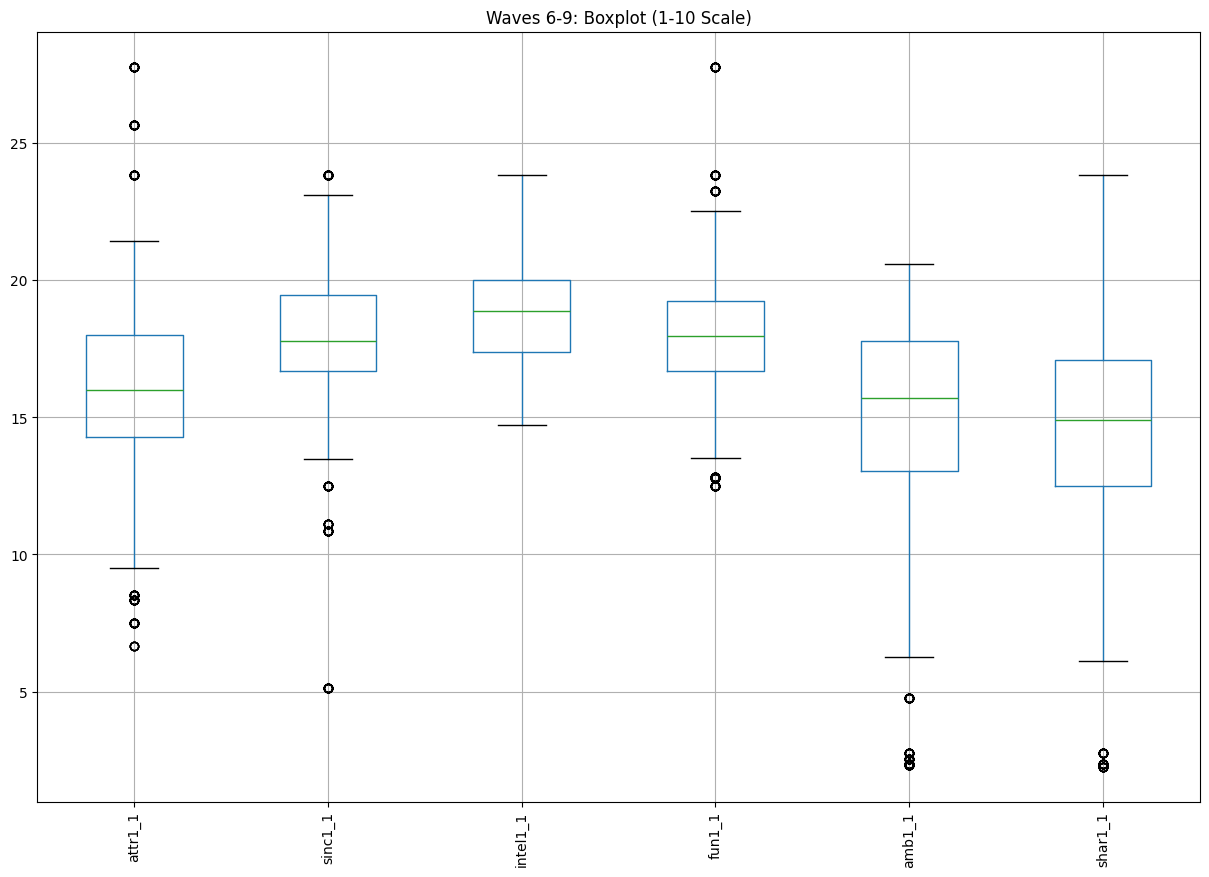

In [12]:
# Columns to rescale
columns_to_rescale = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

# Split the data into two separate DataFrames
df_wave_1_5_10_21 = df[df['wave'].isin([1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])]
df_wave_6_9 = df[df['wave'].isin([6, 7, 8, 9])]

# Perform analysis separately on the two DataFrames
# Example: boxplot for each set of waves
df_wave_1_5_10_21.boxplot(column=columns_to_rescale, figsize=(15, 10))
plt.xticks(rotation=90)
plt.title('Waves 1-5 and 10-21: Boxplot (Rescaled)')
plt.show()

df_wave_6_9.boxplot(column=columns_to_rescale, figsize=(15, 10))
plt.xticks(rotation=90)
plt.title('Waves 6-9: Boxplot (1-10 Scale)')
plt.show()

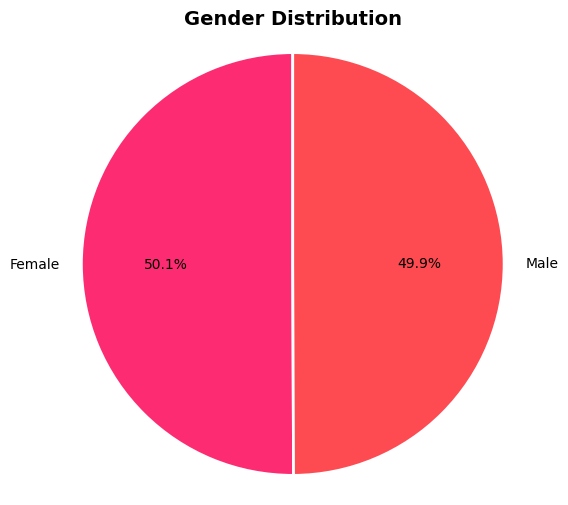

In [13]:
# Count the occurrences of each gender (assuming 0 = Female, 1 = Male)
gender_counts = df['gender'].value_counts()

# Define custom colors for Female and Male
colors = ['#FD2C72', '#FE4A51']  # Pink shades for Female and Male

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, colors=colors, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Add a title and ensure the pie chart is circular
plt.title('Gender Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')  # Ensure the pie chart is drawn as a circle

# Show the plot
plt.show()

In [14]:
# Créer une copie des colonnes pertinentes pour éviter de modifier la base de données
df_visualization = df[['age', 'gender']].copy()

# Regrouper les âges en tranches de 5 ans, de 18 à 55 ans (inclus)
df_visualization['age_group'] = pd.cut(df_visualization['age'], bins=[18, 23, 28, 33, 38, 43, 48, 56], right=False, labels=[
    '18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-55'])

# Mapping des genres pour l'affichage, sans toucher à la base de données
gender_mapping = {
    0: 'Female',
    1: 'Male'
}

# Appliquer le mapping sur le DataFrame de visualisation seulement
df_visualization['gender_label'] = df_visualization['gender'].map(gender_mapping)

# Compter les occurrences de chaque groupe d'âge par genre
age_gender_counts = df_visualization.groupby(['age_group', 'gender_label'], observed=False).size().reset_index(name='Count')

# Calculer le pourcentage de chaque tranche d'âge pour chaque genre
age_gender_counts['Percentage'] = age_gender_counts.groupby('gender_label')['Count'].transform(lambda x: x / x.sum() * 100)

# Inverser les valeurs pour 'Female' pour qu'elles soient affichées à gauche
age_gender_counts.loc[age_gender_counts['gender_label'] == 'Female', 'Count'] *= -1

# Combiner le nombre et le pourcentage pour l'affichage des étiquettes
age_gender_counts['Label'] = age_gender_counts.apply(lambda row: f"{abs(row['Count'])} ({row['Percentage']:.1f}%)", axis=1)

# Couleurs personnalisées pour Female et Male
colors = ['#FD2C72', '#FE4A51']

# Créer la pyramide des âges (graphe en barres horizontales empilées)
fig = px.bar(age_gender_counts, x='Count', y='age_group', color='gender_label', orientation='h',
             title='Age Pyramid by Gender (5-Year Intervals)',
             labels={'age_group': 'Age Group', 'Count': 'Number of People', 'gender_label': 'Gender'},
             color_discrete_sequence=colors, text=age_gender_counts['Label'])  # Ajouter les étiquettes avec le nombre et le pourcentage

# Mettre à jour la mise en page : ajuster la taille, les polices et ajouter des étiquettes personnalisées
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    xaxis_title='Number of People',
    yaxis_title='Age Group',
    width=900,  # Augmenter la largeur
    height=600  # Ajuster la hauteur pour un meilleur espacement
)

# Afficher le graphique
fig.show()

In [15]:
# Valeur la plus petite (âge minimum)
age_min = df['age'].min()

# Valeur la plus grande (âge maximum)
age_max = df['age'].max()

# Afficher les résultats
print(f"L'âge minimum est : {age_min}")
print(f"L'âge maximum est : {age_max}")

L'âge minimum est : 18.0
L'âge maximum est : 55.0


In [16]:
# Mapping des numéros de race vers leurs descriptions respectives (seulement pour le graphique)
race_mapping = {
    1: 'Black/African American',
    2: 'European/Caucasian-American',
    3: 'Latino/Hispanic American',
    4: 'Asian/Pacific Islander/Asian-American',
    5: 'Native American',
    6: 'Other'
}

# Appliquer le mapping uniquement pour le graphique sans modifier la base de données
df['race_label'] = df['race'].map(race_mapping)

# Compter les occurrences de chaque catégorie de race
race_counts = df['race_label'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']  # Renommer les colonnes pour plus de clarté

# Couleurs personnalisées pour chaque catégorie de race (nuances de rose/rouge)
colors = ['#FD2C72', '#FE4A51', '#FF6A61', '#FF8A7B', '#FFA69B', '#FFC2BD']

# Créer le graphique en camembert (pie chart)
fig = px.pie(race_counts, names='Race', values='Count', title='Race Distribution',
             color='Race', color_discrete_sequence=colors)

# Mettre à jour la mise en page : ajuster la taille du graphique et la taille des polices
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    width=800,
    height=500
)

# Afficher le graphique
fig.show()

In [28]:
# Dictionnaire pour interpréter les options de la colonne 'goal'
goal_mapping = {
    1: 'Seemed like a fun night out',
    2: 'To meet new people',
    3: 'To get a date',
    4: 'Serious relationship',
    5: 'To say I did it',
    6: 'Other'
}

# Appliquer ce mapping uniquement pour la visualisation
df['goal_label'] = df['goal'].map(goal_mapping)

# Compter les occurrences de chaque option de goal par genre
goal_gender_counts = df.groupby(['goal_label', 'gender']).size().reset_index(name='Count')

# Trier les données du plus grand au plus petit nombre de participants
goal_gender_counts = goal_gender_counts.sort_values(by='Count', ascending=False)

# Custom colors for Female and Male
colors = ['#FD2C72', '#FE4A51']  # Rose pour Female, Rouge pour Male

# Créer l'histogramme stylisé avec barres côte à côte
fig = px.histogram(goal_gender_counts, x='goal_label', y='Count', color='gender',
                   title='Goal Distribution by Gender',
                   labels={'goal_label': 'Goal', 'Count': 'Number of People', 'gender': 'Gender (0=Female, 1=Male)'},
                   barmode='group',  # Barres côte à côte pour comparaison
                   color_discrete_sequence=colors)  # Couleurs personnalisées

# Mettre à jour la mise en page pour améliorer la lisibilité
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
     xaxis_tickfont_size=10,  # Taille plus petite pour les labels de l'axe X
    yaxis_tickfont_size=10,  # Taille plus petite pour les labels de l'axe Y
    xaxis_title_font_size=12,  # Taille plus petite pour le titre de l'axe X
    yaxis_title_font_size=12,  # Taille plus petite pour le titre de l'axe Y
    width=900,
    height=600
)

# Afficher le graphique
fig.show()

In [30]:
# Dictionnaire pour interpréter les options de la colonne 'date'
date_mapping = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'
}

# Appliquer ce mapping uniquement pour la visualisation
df['date_label'] = df['date'].map(date_mapping)

# Forcer l'ordre des catégories pour l'affichage dans le graphique
category_order = ['Several times a week', 'Twice a week', 'Once a week', 
                  'Twice a month', 'Once a month', 'Several times a year', 'Almost never']

# Compter les occurrences de chaque option de date par genre
date_gender_counts = df.groupby(['date_label', 'gender']).size().reset_index(name='Count')

# Custom colors for Female and Male
colors = ['#FD2C72', '#FE4A51']  # Rose pour Female, Rouge pour Male

# Créer l'histogramme stylisé avec barres côte à côte et ordre spécifique des catégories
fig = px.histogram(date_gender_counts, x='date_label', y='Count', color='gender',
                   category_orders={'date_label': category_order},  # Forcer l'ordre des catégories
                   title='Date Frequency Distribution by Gender',
                   labels={'date_label': 'Date Frequency', 'Count': 'Number of People', 'gender': 'Gender (0=Female, 1=Male)'},
                   barmode='group',  # Barres côte à côte pour comparaison
                   color_discrete_sequence=colors)  # Couleurs personnalisées

# Mettre à jour la mise en page pour améliorer la lisibilité
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis_tickfont_size=10,  # Taille plus petite pour les labels de l'axe X
    yaxis_tickfont_size=10,  # Taille plus petite pour les labels de l'axe Y
    xaxis_title_font_size=12,  # Taille plus petite pour le titre de l'axe X
    yaxis_title_font_size=12,  # Taille plus petite pour le titre de l'axe Y
    width=900,
    height=600
)

# Afficher le graphique
fig.show()

In [31]:
# Dictionnaire pour interpréter les options de la colonne 'go_out'
go_out_mapping = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'
}

# Appliquer ce mapping uniquement pour la visualisation
df['go_out_label'] = df['go_out'].map(go_out_mapping)

# Forcer l'ordre des catégories pour l'affichage dans le graphique
category_order_go_out = ['Several times a week', 'Twice a week', 'Once a week', 
                         'Twice a month', 'Once a month', 'Several times a year', 'Almost never']

# Compter les occurrences de chaque option de go_out par genre
go_out_gender_counts = df.groupby(['go_out_label', 'gender']).size().reset_index(name='Count')

# Custom colors for Female and Male
colors = ['#FD2C72', '#FE4A51']  # Rose pour Female, Rouge pour Male

# Créer l'histogramme stylisé avec barres côte à côte et ordre spécifique des catégories pour 'go_out'
fig = px.histogram(go_out_gender_counts, x='go_out_label', y='Count', color='gender',
                   category_orders={'go_out_label': category_order_go_out},  # Forcer l'ordre des catégories
                   title='Go Out Frequency Distribution by Gender',
                   labels={'go_out_label': 'Go Out Frequency', 'Count': 'Number of People', 'gender': 'Gender (0=Female, 1=Male)'},
                   barmode='group',  # Barres côte à côte pour comparaison
                   color_discrete_sequence=colors)  # Couleurs personnalisées

# Mettre à jour la mise en page pour améliorer la lisibilité
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis_tickfont_size=10,  # Taille plus petite pour les labels de l'axe X
    yaxis_tickfont_size=10,  # Taille plus petite pour les labels de l'axe Y
    xaxis_title_font_size=12,  # Taille plus petite pour le titre de l'axe X
    yaxis_title_font_size=12,  # Taille plus petite pour le titre de l'axe Y
    width=900,
    height=600
)

# Afficher le graphique
fig.show()

In [33]:
# Dictionnaire pour interpréter les options de la colonne 'career_c'
career_mapping = {
    1: 'Lawyer',
    2: 'Academic/Research',
    3: 'Psychologist',
    4: 'Doctor/Medicine',
    5: 'Engineer',
    6: 'Creative Arts/Entertainment',
    7: 'Banking/Consulting/Finance/CEO/etc',
    8: 'Real Estate',
    9: 'International/Humanitarian Affairs',
    10: 'Undecided',
    11: 'Social Work',
    12: 'Speech Pathology',
    13: 'Politics',
    14: 'Pro sports/Athletics',
    15: 'Other',
    16: 'Journalism',
    17: 'Architecture'
}

# Mapping des genres
gender_mapping = {
    0: 'Female',
    1: 'Male'
}

# Créer des colonnes temporaires pour le mapping sans écraser la base de données
df['career_label_temp'] = df['career_c'].map(career_mapping)
df['gender_label_temp'] = df['gender'].map(gender_mapping)

# Compter les occurrences de chaque catégorie de carrière par genre
career_gender_counts = df.groupby(['career_label_temp', 'gender_label_temp']).size().reset_index(name='Count')

# Calculer le nombre total par carrière pour trier du plus grand au plus petit
career_totals = career_gender_counts.groupby('career_label_temp')['Count'].sum().reset_index(name='Total')
career_gender_counts = pd.merge(career_gender_counts, career_totals, on='career_label_temp')

# Trier les carrières du plus grand au plus petit
career_gender_counts = career_gender_counts.sort_values(by='Total', ascending=False)

# Couleurs personnalisées pour les genres
colors = ['#FD2C72', '#FE4A51']

# Créer le graphique en barres groupées
fig = px.bar(career_gender_counts, x='career_label_temp', y='Count', color='gender_label_temp', barmode='group',
             title='Career Distribution by Gender',
             labels={'career_label_temp': 'Career', 'Count': 'Number of People', 'gender_label_temp': 'Gender'},
             color_discrete_sequence=colors)

# Mettre à jour la mise en page pour améliorer la lisibilité
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis_tickfont_size=10,  # Taille plus petite pour les labels de l'axe X
    yaxis_tickfont_size=12,  # Taille pour les labels de l'axe Y
    width=900,  # Augmenter la largeur pour une meilleure visibilité des labels
    height=600  # Ajuster la hauteur pour un espacement optimal
)

# Rotation des labels sur l'axe X pour une meilleure lisibilité
fig.update_xaxes(tickangle=-45)

# Afficher le graphique
fig.show()

In [41]:
# Liste des colonnes d'activités
activities = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 
              'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Moyenne des réponses pour chaque activité par genre
activity_by_gender = df.groupby('gender')[activities].mean().reset_index()

# Créer des colonnes temporaires pour les labels de genre
activity_by_gender['gender_label'] = activity_by_gender['gender'].map({0: 'Female', 1: 'Male'})

# Transformer les données pour les adapter à un diagramme polaire (sans inclure gender comme activité)
activity_melted = pd.melt(activity_by_gender, id_vars='gender_label', value_vars=activities, 
                          var_name='Activity', value_name='Average Score')

# Couleurs personnalisées pour les genres
colors = ['#FD2C72', '#E4BC3C']  # Rose pour Female, Rouge pour Male

# Créer le graphique polaire combiné avec les deux genres
fig = px.line_polar(activity_melted, r='Average Score', theta='Activity', line_close=True, 
                    title='Activity Preferences by Gender', color='gender_label', color_discrete_sequence=colors)

# Mise à jour du layout pour un graphique plus grand, épaississement des lignes, et suppression des labels 'gender' dans les activités
fig.update_traces(line=dict(width=4))  # Épaissir les lignes

fig.update_layout(
    title_font_size=20,
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 10])
    ),
    template='plotly_white',
    plot_bgcolor='#F0F2F4',  # Fond personnalisé
    paper_bgcolor='#F0F2F4',  # Fond du papier
    width=900,  # Augmenter la taille du graphique
    height=800,  # Augmenter la hauteur
    showlegend=True,  # Afficher la légende avec les couleurs de genre
    legend_title_text='Gender'  # Garder le titre de la légende
)

# Afficher le graphique
fig.show()